In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%inline matplotlib

UsageError: Line magic function `%inline` not found.


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

In [5]:
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
tf.random.set_seed(42)
np.random.seed(42)

In [7]:
x_train.shape

(55000, 28, 28)

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [11]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization_3/gamma:0', True),
 ('batch_normalization_3/beta:0', True),
 ('batch_normalization_3/moving_mean:0', False),
 ('batch_normalization_3/moving_variance:0', False)]

In [12]:
model.layers[1]

In [13]:
bn1 = model.layers[1]

In [14]:
bn1

In [15]:
bn1.updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 97us/sample - loss: 0.8317 - accuracy: 0.7230 - val_loss: 0.5517 - val_accuracy: 0.8130
Epoch 2/10
55000/55000 [==============================] - 5s 86us/sample - loss: 0.5671 - accuracy: 0.8047 - val_loss: 0.4763 - val_accuracy: 0.8388
Epoch 3/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.5129 - accuracy: 0.8212 - val_loss: 0.4416 - val_accuracy: 0.8482
Epoch 4/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.4812 - accuracy: 0.8319 - val_loss: 0.4186 - val_accuracy: 0.8544
Epoch 5/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.4567 - accuracy: 0.8396 - val_loss: 0.4045 - val_accuracy: 0.8602
Epoch 6/10
55000/55000 [==============================] - 6s 101us/sample - loss: 0.4413 - accuracy: 0.8457 - val_loss: 0.3929 - val_accuracy: 0.8620
Epoch 7/10
55000/55000 [==============================] 

In [18]:
mse_test = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3990 - accuracy: 0.8570


In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer='he_normal', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(100, kernel_initializer='he_normal', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(10, activation='softmax')
])

In [23]:
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.8962 - accuracy: 0.7016 - val_loss: 0.6165 - val_accuracy: 0.7948
Epoch 2/10
55000/55000 [==============================] - 6s 101us/sample - loss: 0.6223 - accuracy: 0.7863 - val_loss: 0.5333 - val_accuracy: 0.8202
Epoch 3/10
55000/55000 [==============================] - 6s 100us/sample - loss: 0.5651 - accuracy: 0.8068 - val_loss: 0.4944 - val_accuracy: 0.8330
Epoch 4/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.5342 - accuracy: 0.8152 - val_loss: 0.4698 - val_accuracy: 0.8428
Epoch 5/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.5086 - accuracy: 0.8228 - val_loss: 0.4546 - val_accuracy: 0.8478
Epoch 6/10
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4960 - accuracy: 0.8277 - val_loss: 0.4419 - val_accuracy: 0.8508
Epoch 7/10
55000/55000 [=============================

In [25]:
mse_test = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.4515 - accuracy: 0.8381


In [26]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [27]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 103us/sample - loss: 1.0214 - accuracy: 0.6848 - val_loss: 0.6579 - val_accuracy: 0.7900
Epoch 2/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.6595 - accuracy: 0.7874 - val_loss: 0.5467 - val_accuracy: 0.8188
Epoch 3/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.5820 - accuracy: 0.8055 - val_loss: 0.4972 - val_accuracy: 0.8328
Epoch 4/10
55000/55000 [==============================] - 5s 97us/sample - loss: 0.5378 - accuracy: 0.8194 - val_loss: 0.4657 - val_accuracy: 0.8438
Epoch 5/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.5071 - accuracy: 0.8266 - val_loss: 0.4433 - val_accuracy: 0.8472
Epoch 6/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.4882 - accuracy: 0.8319 - val_loss: 0.4265 - val_accuracy: 0.8522
Epoch 7/10
55000/55000 [==============================]

In [29]:
mse_test = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.4249 - accuracy: 0.8509


In [31]:
def split_dataset(x, y):
    y_5_or_6 = (y == 5) | (y==6)
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    return ((x[~y_5_or_6], y_A), (x[y_5_or_6], y_B))

In [32]:
(x_train_a, y_train_a), (x_train_b, y_train_b) = split_dataset(x_train, y_train)
(x_valid_a, y_valid_a), (x_valid_b, y_valid_b) = split_dataset(x_valid, y_valid)
(x_test_a, y_test_a), (x_test_b, y_test_b) = split_dataset(x_test, y_test)
x_train_b = x_train_b[:200]
y_train_b = y_train_b[:200]

In [33]:
x_train_a.shape

(43986, 28, 28)

In [34]:
y_train_a.shape

(43986,)

In [35]:
x_train_b.shape, y_train_b.shape

((200, 28, 28), (200,))

In [37]:
y_train_a[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [38]:
y_train_b[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [39]:
tf.random.set_seed(42)
np.random.seed(42)

In [40]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation='selu'))
model_A.add(keras.layers.Dense(8, activation='softmax'))

In [41]:
model_A.compile(loss='sparse_categorical_crossentropy', 
               optimizer=keras.optimizers.SGD(lr=1e-3),
               metrics=['accuracy'])

In [42]:
history = model_A.fit(x_train_a, y_train_a, epochs=20, validation_data=(x_valid_a, y_valid_a))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 3s 76us/sample - loss: 0.5902 - accuracy: 0.8131 - val_loss: 0.3784 - val_accuracy: 0.8692
Epoch 2/20
43986/43986 [==============================] - 3s 73us/sample - loss: 0.3517 - accuracy: 0.8784 - val_loss: 0.3369 - val_accuracy: 0.8832
Epoch 3/20
43986/43986 [==============================] - 3s 69us/sample - loss: 0.3163 - accuracy: 0.8896 - val_loss: 0.3017 - val_accuracy: 0.8959
Epoch 4/20
43986/43986 [==============================] - 3s 69us/sample - loss: 0.2969 - accuracy: 0.8972 - val_loss: 0.2912 - val_accuracy: 0.9028
Epoch 5/20
43986/43986 [==============================] - 3s 72us/sample - loss: 0.2831 - accuracy: 0.9027 - val_loss: 0.2816 - val_accuracy: 0.9018
Epoch 6/20
43986/43986 [==============================] - 3s 73us/sample - loss: 0.2725 - accuracy: 0.9066 - val_loss: 0.2737 - val_accuracy: 0.9071
Epoch 7/20
43986/43986 [==============================] -

In [43]:
mse_test = model_A.evaluate(x_test_a, y_test_a)

8000/8000 [==============================] - 0s 40us/sample - loss: 0.2543 - accuracy: 0.9089


In [44]:
model_A.save('model_A.h5')

In [45]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation='selu'))
model_B.add(keras.layers.Dense(1, activation='sigmoid'))

In [46]:
model_B.compile(loss='binary_crossentropy',
               optimizer=keras.optimizers.SGD(lr=1e-3),
               metrics=['accuracy'])

In [48]:
history = model_B.fit(x_train_b, y_train_b, epochs=20, validation_data=(x_valid_b, y_valid_b))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 0s 2ms/sample - loss: 0.9509 - accuracy: 0.4800 - val_loss: 0.6533 - val_accuracy: 0.5568
Epoch 2/20
200/200 [==============================] - 0s 284us/sample - loss: 0.5837 - accuracy: 0.7100 - val_loss: 0.4825 - val_accuracy: 0.8479
Epoch 3/20
200/200 [==============================] - 0s 282us/sample - loss: 0.4527 - accuracy: 0.8750 - val_loss: 0.4097 - val_accuracy: 0.8945
Epoch 4/20
200/200 [==============================] - 0s 292us/sample - loss: 0.3869 - accuracy: 0.9050 - val_loss: 0.3630 - val_accuracy: 0.9209
Epoch 5/20
200/200 [==============================] - 0s 281us/sample - loss: 0.3404 - accuracy: 0.9300 - val_loss: 0.3302 - val_accuracy: 0.9280
Epoch 6/20
200/200 [==============================] - 0s 293us/sample - loss: 0.3073 - accuracy: 0.9350 - val_loss: 0.3026 - val_accuracy: 0.9381
Epoch 7/20
200/200 [==============================] - 0s 315us/sample - loss: 0.

In [49]:
mse_test = model_B.evaluate(x_test_b, y_test_b)

2000/2000 [==============================] - 0s 38us/sample - loss: 0.1426 - accuracy: 0.9695


In [50]:
model_A.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_17 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_18 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_19 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_20 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_21 (Dense)             (None, 8)                

In [51]:
model_B.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_23 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_24 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_25 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [52]:
model_A = keras.models.load_model('model_A.h5')

In [53]:
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

In [54]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [55]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

In [56]:
model_B_on_A.compile(loss='binary_crossentropy',
                    optimizer=keras.optimizers.SGD(lr=1e-3),
                    metrics=['accuracy'])

In [58]:
history = model_B_on_A.fit(x_train_b, y_train_b, epochs=4, validation_data=(x_valid_b, y_valid_b))
for layer in model_B_on_A.layers[:-1]:
    layer.trainable=True
model_B_on_A.compile(loss='binary_crossentropy',
                    optimizer=keras.optimizers.SGD(lr=1e-4),
                    metrics=['accuracy'])
history = model_B_on_A.fit(x_train_b, y_train_b, epochs=20, validation_data=(x_valid_b, y_valid_b))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 0s 2ms/sample - loss: 0.5619 - accuracy: 0.6650 - val_loss: 0.5669 - val_accuracy: 0.6531
Epoch 2/4
200/200 [==============================] - 0s 241us/sample - loss: 0.5249 - accuracy: 0.7200 - val_loss: 0.5337 - val_accuracy: 0.6957
Epoch 3/4
200/200 [==============================] - 0s 247us/sample - loss: 0.4923 - accuracy: 0.7400 - val_loss: 0.5039 - val_accuracy: 0.7211
Epoch 4/4
200/200 [==============================] - 0s 233us/sample - loss: 0.4630 - accuracy: 0.7550 - val_loss: 0.4773 - val_accuracy: 0.7383
Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 0s 2ms/sample - loss: 0.4398 - accuracy: 0.7750 - val_loss: 0.4587 - val_accuracy: 0.7617
Epoch 2/20
200/200 [==============================] - 0s 298us/sample - loss: 0.4209 - accuracy: 0.8100 - val_loss: 0.4416 - val_accuracy: 0.7718
Epoch 3/20
200/200 [====================

In [59]:
model_B_on_A.evaluate(x_test_b, y_test_b)

2000/2000 [==============================] - 0s 41us/sample - loss: 0.2627 - accuracy: 0.9230


[0.2627152454853058, 0.923]

In [60]:
history = model_B_on_A.fit(x_train_b, y_train_b, epochs=4, validation_data=(x_valid_b, y_valid_b))
for layer in model_B_on_A.layers[:-1]:
    layer.trainable=True
model_B_on_A.compile(loss='binary_crossentropy',
                    optimizer=keras.optimizers.SGD(lr=1e-3),
                    metrics=['accuracy'])
history = model_B_on_A.fit(x_train_b, y_train_b, epochs=20, validation_data=(x_valid_b, y_valid_b))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 0s 312us/sample - loss: 0.2272 - accuracy: 0.9550 - val_loss: 0.2575 - val_accuracy: 0.9270
Epoch 2/4
200/200 [==============================] - 0s 289us/sample - loss: 0.2216 - accuracy: 0.9550 - val_loss: 0.2521 - val_accuracy: 0.9290
Epoch 3/4
200/200 [==============================] - 0s 282us/sample - loss: 0.2164 - accuracy: 0.9600 - val_loss: 0.2470 - val_accuracy: 0.9341
Epoch 4/4
200/200 [==============================] - 0s 274us/sample - loss: 0.2115 - accuracy: 0.9600 - val_loss: 0.2422 - val_accuracy: 0.9371
Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 0s 2ms/sample - loss: 0.1926 - accuracy: 0.9700 - val_loss: 0.2015 - val_accuracy: 0.9564
Epoch 2/20
200/200 [==============================] - 0s 376us/sample - loss: 0.1577 - accuracy: 0.9800 - val_loss: 0.1736 - val_accuracy: 0.9665
Epoch 3/20
200/200 [==================

In [61]:
model_B_on_A.evaluate(x_test_b, y_test_b)

2000/2000 [==============================] - 0s 40us/sample - loss: 0.0549 - accuracy: 0.9945


[0.054912917613983155, 0.9945]

In [62]:
model_B.evaluate(x_test_b, y_test_b)

2000/2000 [==============================] - 0s 38us/sample - loss: 0.1426 - accuracy: 0.9695


[0.14263125681877137, 0.9695]

In [68]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [69]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [70]:
n_epochs=25
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=n_epochs, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 4s 78us/sample - loss: 0.5867 - accuracy: 0.7977 - val_loss: 0.4657 - val_accuracy: 0.8388
Epoch 2/25
55000/55000 [==============================] - 4s 73us/sample - loss: 0.4516 - accuracy: 0.8394 - val_loss: 0.4341 - val_accuracy: 0.8516
Epoch 3/25
55000/55000 [==============================] - 4s 72us/sample - loss: 0.4230 - accuracy: 0.8501 - val_loss: 0.4120 - val_accuracy: 0.8606
Epoch 4/25
55000/55000 [==============================] - 4s 73us/sample - loss: 0.4043 - accuracy: 0.8564 - val_loss: 0.4089 - val_accuracy: 0.8610
Epoch 5/25
55000/55000 [==============================] - 4s 74us/sample - loss: 0.3914 - accuracy: 0.8612 - val_loss: 0.3883 - val_accuracy: 0.8662
Epoch 6/25
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3819 - accuracy: 0.8642 - val_loss: 0.3843 - val_accuracy: 0.8676
Epoch 7/25
55000/55000 [==============================] -

In [71]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(x_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay*epochs*n_steps_per_epoch)

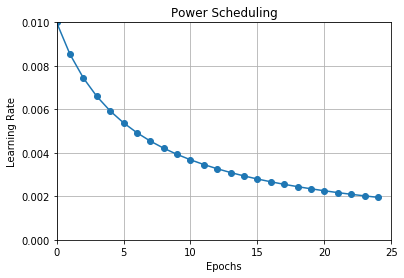

In [72]:
plt.plot(epochs, lrs, 'o-')
plt.axis([0, n_epochs, 0, 0.01])
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.title('Power Scheduling')
plt.show()

In [73]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 ** (epoch/20)

In [74]:
def exponential_decay(lr0, s):
    def exponential_decary_fn(epoch):
        return lr0*0.1**(epoch/s)
    return exponential_decay_fn

In [75]:
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [76]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [79]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])

In [81]:
n_epochs=25
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(x_train, y_train, epochs=n_epochs, validation_data=(x_valid, y_valid), callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 9s 162us/sample - loss: 0.7292 - accuracy: 0.7650 - val_loss: 0.5569 - val_accuracy: 0.8160
Epoch 2/25
55000/55000 [==============================] - 9s 158us/sample - loss: 0.5077 - accuracy: 0.8265 - val_loss: 0.4728 - val_accuracy: 0.8440
Epoch 3/25
55000/55000 [==============================] - 8s 142us/sample - loss: 0.4538 - accuracy: 0.8435 - val_loss: 0.5142 - val_accuracy: 0.8372
Epoch 4/25
55000/55000 [==============================] - 8s 152us/sample - loss: 0.4063 - accuracy: 0.8609 - val_loss: 0.4588 - val_accuracy: 0.8624
Epoch 5/25
55000/55000 [==============================] - 9s 157us/sample - loss: 0.3763 - accuracy: 0.8698 - val_loss: 0.4010 - val_accuracy: 0.8728
Epoch 6/25
55000/55000 [==============================] - 9s 165us/sample - loss: 0.3564 - accuracy: 0.8765 - val_loss: 0.4334 - val_accuracy: 0.8618
Epoch 7/25
55000/55000 [===========================

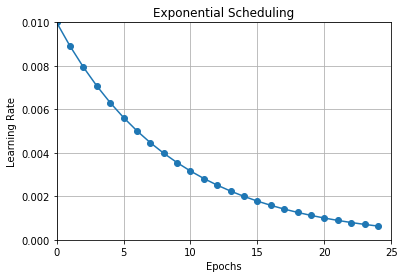

In [82]:
plt.plot(history.epoch, history.history['lr'], 'o-')
plt.axis([0, n_epochs, 0, 0.01])
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Exponential Scheduling')
plt.grid(True)

In [83]:
def exponential_decay_fn(epoch, lr):
    return lr*0.1**(1/20)

In [84]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [86]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.Nadam(),
             metrics=['accuracy'])

In [87]:
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 9s 167us/sample - loss: 0.5807 - accuracy: 0.7873 - val_loss: 0.4340 - val_accuracy: 0.8416
Epoch 2/2
55000/55000 [==============================] - 8s 154us/sample - loss: 0.4559 - accuracy: 0.8318 - val_loss: 0.3660 - val_accuracy: 0.8672
